In [59]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [29]:
def key_figures_light(current,voltage,area):
    """Calculates Ioc and Voc by the values for V and I  above and below
    zero and takes  their average"""
    I1 = max([elem for elem in current if elem<0])
    V1 = max([elem for elem in voltage if elem<0])
    posV = [i for i,x in enumerate(current) if x==I1]
    posI = [i for i,x in enumerate(voltage) if x==V1]
    Isc = (current[posI[0]]+current[posI[0]+1])/2
    jsc = Isc/area      
    Voc = (voltage[posV[0]]+voltage[posV[0]+1])/2  
    Mpp = max(-1*current*voltage)      
    FF = -1*Mpp/(Voc*Isc)
    a=5
    #Data for light
    selectData =voltage[posV[0]-a:posV[0]+a],current[posV[0]-a:posV[0]+a]#data for fitting Rs 
    selectDataRp =voltage[posI[0]-a:posI[0]+a],current[posI[0]-a:posI[0]+a]#data for fitting Rp
    #Regressions
    slopeRS, interceptRS, r_value, p_value, std_err = stats.linregress(selectData[0],selectData[1])
    slopeRp, interceptRp, r_value, p_value, std_err = stats.linregress(selectDataRp[0],selectDataRp[1])
    return Voc,Isc,FF,Mpp,jsc ,selectData,slopeRS, interceptRS,slopeRp, interceptRp

In [30]:
def key_figures_dark(current,voltage,area):
    a=5
    selectData =voltage[:15],current[:15]#data for fitting Rs 
    selectData2 =voltage[-30:],current[-30:]#data for fitting Rs 
    slopeRp, interceptRp, r_value, p_value, std_err = stats.linregress(selectData[0],selectData[1])
    slopeRs, interceptRs, r_value, p_value, std_err = stats.linregress(selectData2[0],selectData2[1])
    return slopeRp, interceptRp,slopeRs, interceptRs

In [49]:
def visualizer_light(filename,area):
    """Extracts Voltage and Current Variables from csv Calcu """
    df = pd.read_csv(filename,names=['Voltage','Current'],header = 1,delimiter='\t')
    V,I,FF1,Mpp1,jsc,Data,sl1,intr1,sl2,intr2 = key_figures_light(df.Current,df.Voltage,area) #is Voc and Isc!--rename?
    fig, ax = plt.subplots()
    plt.plot(df.Voltage,df.Current)
    plt.plot(df.Voltage,-1*df.Voltage*df.Current)
    plt.plot(df.Voltage,df.Voltage*sl1+intr1)
    plt.plot(df.Voltage,df.Voltage*sl2+intr2)
    plt.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.xlabel('Voltage')
    plt.ylabel('Current')
    plt.title(filename[-18:-3])
    plt.show()
    print('Fill Factor = ',FF1*100,'%')
    print('Max Power Point =',Mpp1)
    print('Isc =', I)
    print('Jsc =',jsc)
    print('Voc = ', V)
    print('Rs = ',sl1**-1)
    print('Rp = ',sl2**-1)
    print('Eff =', (Mpp1/area)/(790/10000))
    print(filename[-5:])

In [50]:
def visualizer_dark(filename,area):
    """Extracts Voltage and Current Variables from csv Calcu """
    df = pd.read_csv(filename,names=['Voltage','Current'],header = 1,delimiter='\t')
    sl1,intr1,sl2,intr2 = key_figures_dark(df.Current,df.Voltage,area) #is Voc and Isc!--rename?
    fig, ax = plt.subplots()
    plt.plot(df.Voltage,df.Current)
    plt.plot(df.Voltage,df.Voltage*sl1+intr1)
    plt.plot(df.Voltage,df.Voltage*sl2+intr2)
    plt.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.xlabel('Voltage')
    plt.ylabel('Current')
    plt.title(filename[-18:-3])
    plt.show()
    print('Rp = ',sl1**-1)
    print('Rs = ',sl2**-1)
    print(filename[-5:])

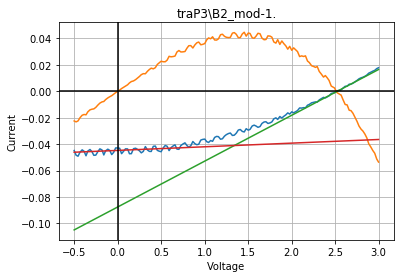

Fill Factor =  41.538770471 %
Max Power Point = 0.044717368329
Isc = -0.042966975
Jsc = -0.214834875
Voc =  2.505462
Rs =  28.8166547482
Rp =  362.96917945
Eff = 2.83021318538
1.txt


In [51]:
fileInput = r'Z:\Sample Analysis\IV-Measurements\IV Experiments\Printed Mini modules\Ceradrop\20170620\extraP3\B2_mod-1.txt'
visualizer_light(fileInput,0.2)

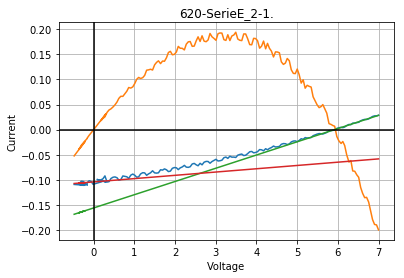

Fill Factor =  30.6704694593 %
Max Power Point = 0.194175654415
Isc = -0.10642995
Jsc = -0.00138220714286
Voc =  5.9485415
Rs =  37.9070968723
Rp =  152.584938715
Eff = 0.031921034755
1.txt


In [52]:
area=7*11
fileInput = r'Z:\Sample Analysis\IV-Measurements\IV Experiments\Printed Large modules\Ceradrop\7x10\20170620\SerieE\20170620-SerieE_2-1.txt'
visualizer_light(fileInput,area)

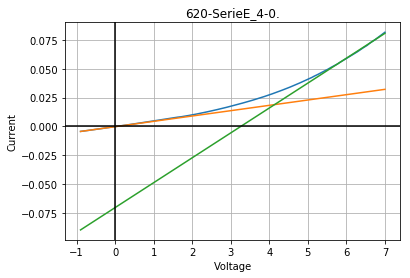

Rp =  216.896775939
Rs =  46.4690265877
0.txt


In [60]:
area=7*11
fileInput = r'Z:\Sample Analysis\IV-Measurements\IV Experiments\Printed Large modules\Ceradrop\7x10\20170620\SerieE\20170620-SerieE_4-0.txt'
visualizer_dark(fileInput,area)

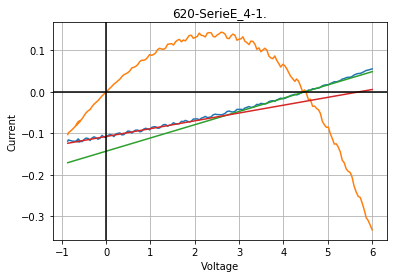

Fill Factor =  29.9437037814 %
Max Power Point = 0.143655057855
Isc = -0.10770225
Jsc = -0.00139873051948
Voc =  4.4544145
Rs =  31.3172387615
Rp =  53.0325244974
Eff = 0.0236158240761
1.txt


In [57]:
area=7*11
fileInput = r'Z:\Sample Analysis\IV-Measurements\IV Experiments\Printed Large modules\Ceradrop\7x10\20170620\SerieE\20170620-SerieE_4-1.txt'
visualizer_light(fileInput,area)